In [1]:
import numpy as np
import os
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
import seaborn as sns; sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import statsmodels.api as sm
%matplotlib inline

from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

from sklearn.decomposition import PCA

In [2]:
d_name = 'data/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

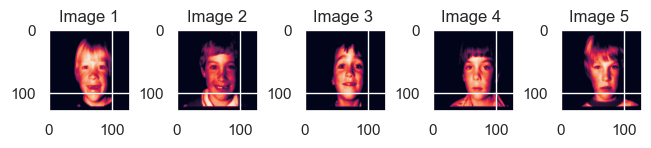

In [3]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()

def plot_5_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()

plot_5_images(X,1,2,3,4,5)

# 1.1 Calcular la mean face. Que es la cara con el promedio de los pixeles y visualizarla

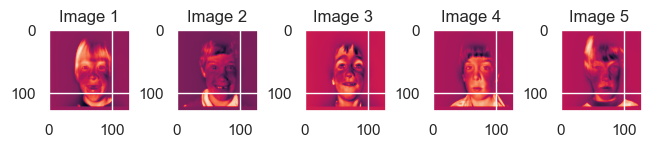

In [4]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_5_images(X_center,1, 2 ,3,4,5)

# 1.2 Centrar los datos, utilizar PCA. ¿Cuántos componentes se deben utilizar para mantener el 90% de las características?. Crear una tabla para mostrar las primeras 5 caras utilizando, la mean face + los datos reconstruidos utilizando la primera componente, después con 5 componentes, después con las primeras 10 componentes, después con las componentes que explican el 90% de la varianza y por último con el numero de componentes que tiene el 99% de la varianza.

## Centralizar de los Datos

In [5]:
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_center)

eigen_values = pca.explained_variance_
eigen_faces = pca.components_

## ¿Cuántos componentes se deben utilizar para mantener el 90% de las características?

Con el 180 eigen faces obtenemos el 90% de las caracteristicas. Esto significa que los primeros 180 componentes principales explican el 90% de la varianza total de las imágenes de caras. Es importante tener en cuenta que el número exacto de componentes principales necesarios para alcanzar cierto nivel de varianza explicada puede variar dependiendo de los datos y el problema en cuestión.

## Reconstruir los datos

### Imagen 1

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

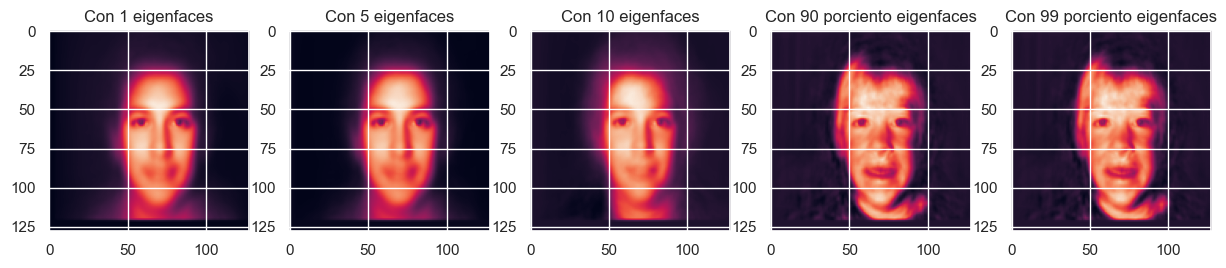

In [6]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### Imagen 2

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

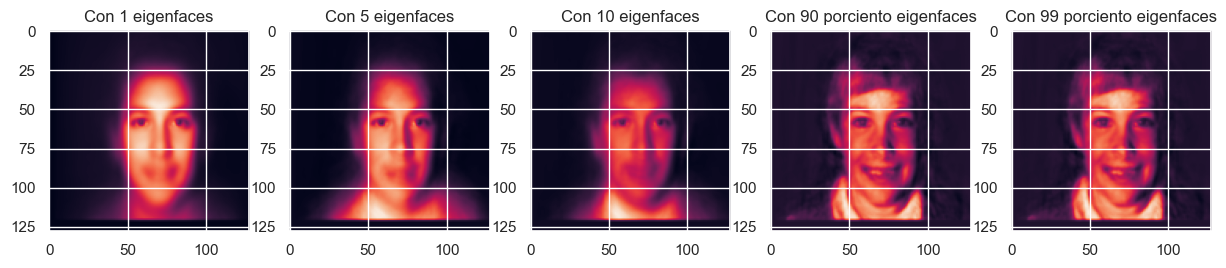

In [7]:
face_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### Imagen 3

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

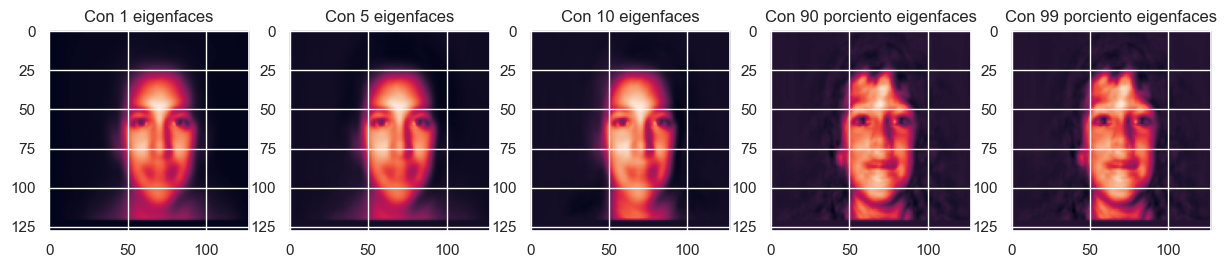

In [8]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### Imagen 4

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

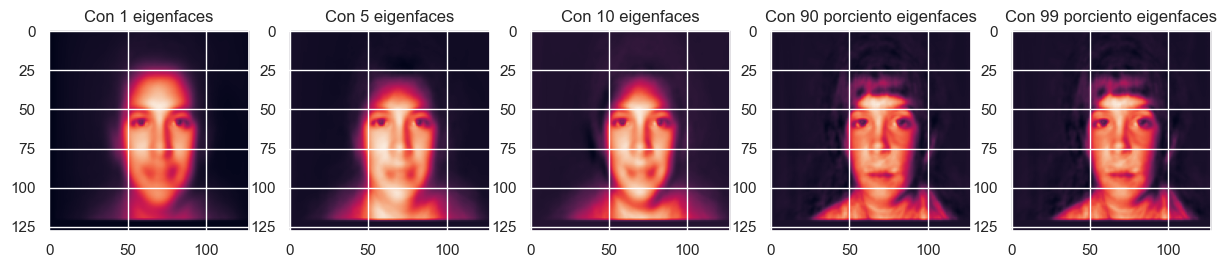

In [9]:
face_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

### Imagen 5

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

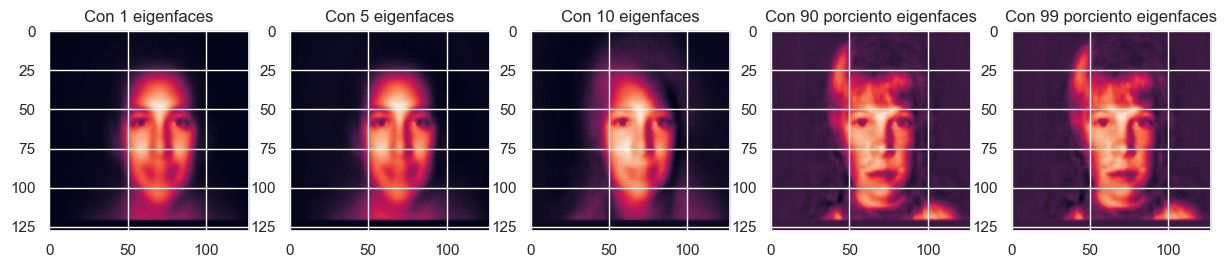

In [10]:
face_1 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))

plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

## ¿Qué se puede concluir de los resultados?